# **ENDG 511 - Lab 1: Introduction to Deep Neural Networks using TensorFlow**

This colab notebook provides code and a framework for ***Lab 1***. You can work out your solutions here. The example in this lab was inspired by https://www.tensorflow.org/tutorials/quickstart/beginner, with some modifications and additions.


## Goals

In this lab, you will be introduced to the baiscs of TensorFlow and Keras, and you will learn how to use them to create deep learning models. The goals of this lab are:

- Understand the basic workflow for creating models in TensorFlow.
- Understand how to train TensorFlow models.
- Evaluate models in terms of accuracy, size and inference time.
- Understand how different model parameters can impact accuracy, size and inference time

## Layout
This lab is split into **two** parts.
- **Part 1**: Run through the full example to gain familiarity with TensorFlow. And complete the exercises.
- **Part 2**: Convlutional Neural Netowrks Using TensorFlow. And complete the exercises.

# **Part 1**: Neural Network Machine Learning Model Using TensorFlow

This part of the lab demonstrates building and training a Neural Network to classify MNIST images. This tutorial uses TensorFlow and it is meant to give you a better understanding of how to build, train and evaluate machine learning models using TensorFlow.

### Import TensorFlow and Other Required Modules

In [65]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

### Download and prepare the MNIST dataset

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9


In [66]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


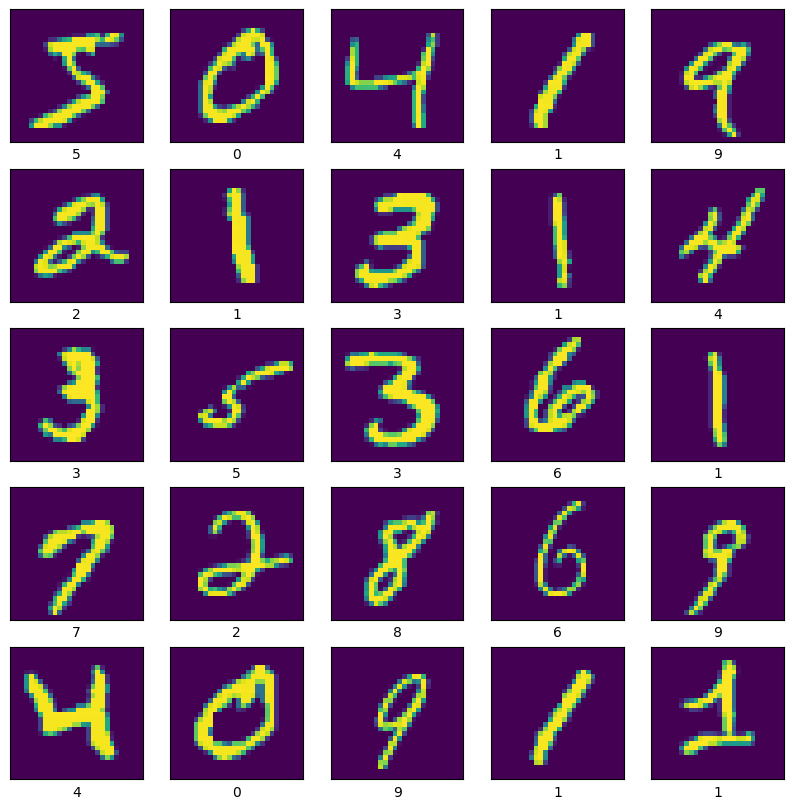

In [67]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build Machine Learning Model

***Sequential*** is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

In [68]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Let's display the architecture of our model:

In [69]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Save and Load Model
Let us save and load the model before training. This allows us to save the randomized weights and biases and make more accurate comparisons. We will use the saved model in the exercise section.

In [70]:
# Save your model
model.save('part1_model.h5')

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile and train the model

When compiling a model, an optimizer, a loss function and metrics need to be defined.

- Optimizer: The Adam optimizer is the most popular optimizer and generally works well for classification and regression problems. It is based of gradient descent algorithms.
- Loss Function: The loss function is the function that computes the distance between the current output of the algorithm and the expected output. These functions need to be chosen depending on the application, the SparseCategoricalCrossentropy for example computes the crossentropy loss between the labels and predictions.
- Metrics: A metric is a function that is used to judge the performance of your model. This could be accuracy, mean squared error, cosine similarity or whatever metric works best for your use case.

In [71]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3004 - accuracy: 0.9133 - val_loss: 0.1414 - val_accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1423 - accuracy: 0.9572 - val_loss: 0.1024 - val_accuracy: 0.9694
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9672 - val_loss: 0.0912 - val_accuracy: 0.9705
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0885 - accuracy: 0.9726 - val_loss: 0.0820 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0746 - accuracy: 0.9766 - val_loss: 0.0811 - val_accuracy: 0.9767


### Plot accuracy and loss graphs

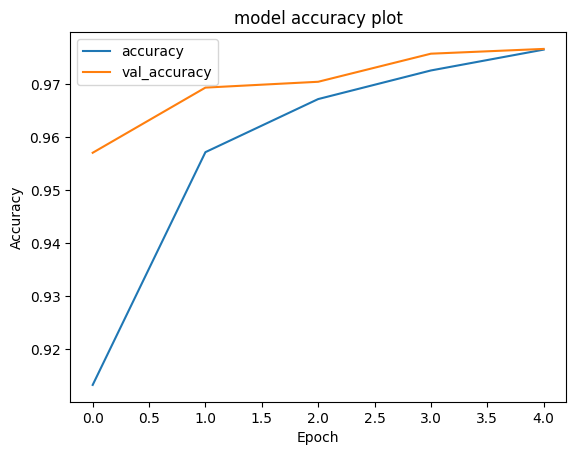

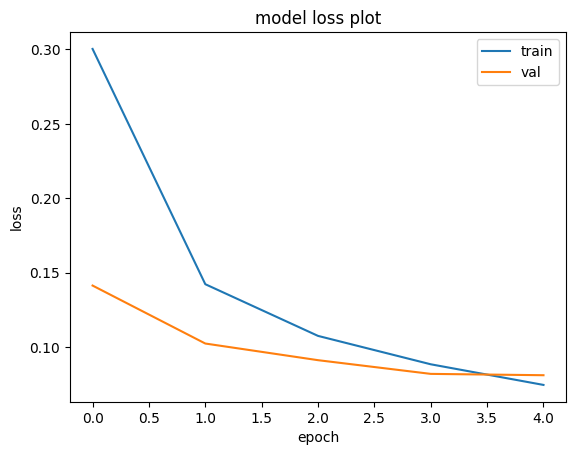

In [72]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
There are many metrics that can be used to evaluate a model. We will focus on three metrics for this lab:
1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [73]:
# Evaluate prediction accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0811 - accuracy: 0.9767 - 746ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 97.67000079154968 %
Model Size: 374965.00 bytes
Inference Time is 8.399367332458496e-05 s


### Excercies (2.5 points)


Question 1: Load the untrained model. Change the learning rate to 1.5, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 16.6157 - accuracy: 0.1035 - val_loss: 2.4590 - val_accuracy: 0.0892
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4556 - accuracy: 0.1016 - val_loss: 2.4253 - val_accuracy: 0.1031
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4623 - accuracy: 0.1022 - val_loss: 2.4575 - val_accuracy: 0.1138
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4587 - accuracy: 0.1010 - val_loss: 2.3751 - val_accuracy: 0.1035
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4531 - accuracy: 0.1003 - val_loss: 2.4491 - val_accuracy: 0.1035


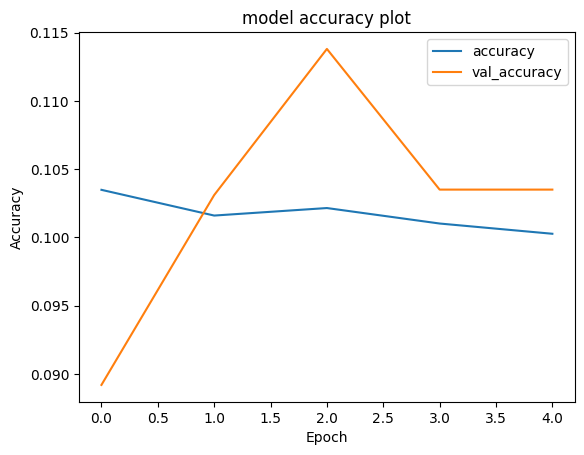

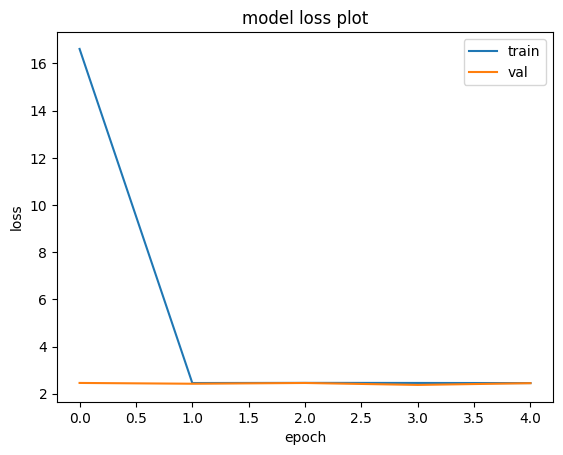

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

We observe the accuracy and loss plots become significantly less accurate when the learning rate is increased form 0.001 to 1.5. Additionally, we find the new model sees the loss plot be more consistent in its loss values vs. the original is constantly changing. Lastly, the new plot for accuracy is alot more unpredictable.

Question 2: Load the untrained model. Change the learning rate to 0.0001, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

In [76]:
e12_model = tf.keras.models.load_model('part1_model.h5')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
e12_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = e12_model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7076 - accuracy: 0.8122 - val_loss: 0.3344 - val_accuracy: 0.9101
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3388 - accuracy: 0.9043 - val_loss: 0.2595 - val_accuracy: 0.9288
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9232 - val_loss: 0.2178 - val_accuracy: 0.9391
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2360 - accuracy: 0.9332 - val_loss: 0.1898 - val_accuracy: 0.9455
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2066 - accuracy: 0.9413 - val_loss: 0.1686 - val_accuracy: 0.9521


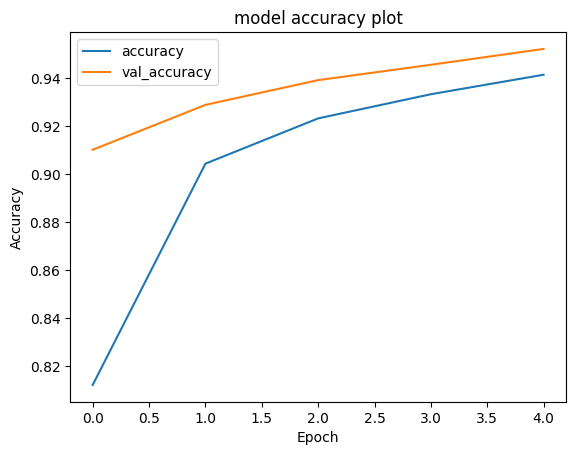

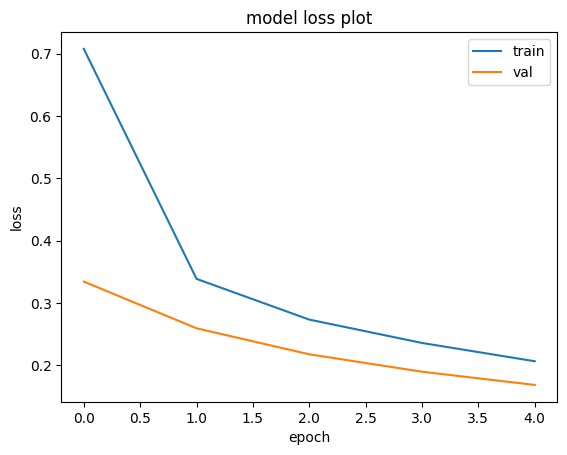

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

The new model with a learning rate of 0.0001, is much closer to the original model but training and validation is slightly lower. Additionally the model's training and validation loss has increased slightly from the original's. Lastly, the new model's accuracy and loss increases logarithmically with each epoch like the original model.


Question 3: Rebuild the model with 8 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

In [40]:
e13_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
e13_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 8)                 6280      
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_32 (Dense)            (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
e13_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

e13_model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))
e13_model.save('exercise_1_3_model.h5')

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9779 - accuracy: 0.6564 - val_loss: 0.4834 - val_accuracy: 0.8683
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7283 - accuracy: 0.7592 - val_loss: 0.4141 - val_accuracy: 0.8918
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6753 - accuracy: 0.7828 - val_loss: 0.3804 - val_accuracy: 0.8976
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6443 - accuracy: 0.7933 - val_loss: 0.3630 - val_accuracy: 0.9005
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6361 - accuracy: 0.7956 - val_loss: 0.3604 - val_accuracy: 0.9018


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# Evaluate prediction accuracy
test_loss, test_acc = e13_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = e13_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('exercise_1_3_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.3604 - accuracy: 0.9018 - 544ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step

Model Accuracy: 90.17999768257141 %
Model Size: 70367.00 bytes
Inference Time is 7.641313076019288e-05 s


the new model with the reduced neurons yields a much lower accuracy by about 7% but on the other hand the model size is now signigicantly smaller by about 300,000 bytes which also leads to a lower inference time.

Question 4: Rebuild the model with 2048 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

In [43]:
e14_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
e14_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_34 (Dense)            (None, 10)                20490     
                                                                 
Total params: 1628170 (6.21 MB)
Trainable params: 1628170 (6.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
e14_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

e14_model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))
e14_model.save('exercise_1_4_model.h5')

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1882 - accuracy: 0.9429 - val_loss: 0.1023 - val_accuracy: 0.9685
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0901 - accuracy: 0.9721 - val_loss: 0.0797 - val_accuracy: 0.9727
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0630 - accuracy: 0.9796 - val_loss: 0.0718 - val_accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0502 - accuracy: 0.9835 - val_loss: 0.0941 - val_accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0402 - accuracy: 0.9867 - val_loss: 0.0734 - val_accuracy: 0.9786


In [45]:
# Evaluate prediction accuracy
test_loss, test_acc = e14_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = e14_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('exercise_1_4_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0734 - accuracy: 0.9786 - 549ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 97.8600025177002 %
Model Size: 16188480.00 bytes
Inference Time is 7.673747539520264e-05 s


in the case of increasing the number of neurons to 2048 we find the accuracy is now slightly higher but the model size grows to be exponentially bigger now. we would usualy expect the inference time to also increase but in this case it was lower than the original and had a similar amount of inference time as the 8 neurons scenario.

# **Part 2**: Convlutional Neural Netowrks Using TensorFlow

### Introduction:

Convolutional Neural Networks (CNN) are distinguished by their ability to identify patterns and features in images (e.g. edges, lines, circles or even objects). CNN's are widely adopted in computer vision applications and found success in audio signals and text.


A typical Convolutional neural network is composed mainly of three types of layers:

* **Convolutional layer:** The core building block of a CNN, which consists of Filters or kernels to detect features. Generally, the first convolutional layers detect simple features (e.g. edges) and later layers identify objects.
* **Pooling layer:** Reduces the spatial size of the feature maps so having fewer learnable weights and less computation cost.
* **Fully-connected layer:**  Known as the output layer, where the last identified feature maps are flattened and connected to dense layers for the classification task.



### Import TensorFlow and Other Required Modules

In [46]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

### Download and prepare the MNIST dataset
Similar to Part 1, loading the MNIST dataset and performing normalization to improve the training performance and speed.

In [47]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Build Machine Learning Model
In this part, we will build the LeNet-5 CNN model, one of the earliest CNN architectures proposed by Yann LeCun and others for recognizing handwritten and machine-printed characters.

The LeNet-5 architecture cosisits of 2 convolutional layers, 2 pooling layers and fully connected layers as shown in the figure below.

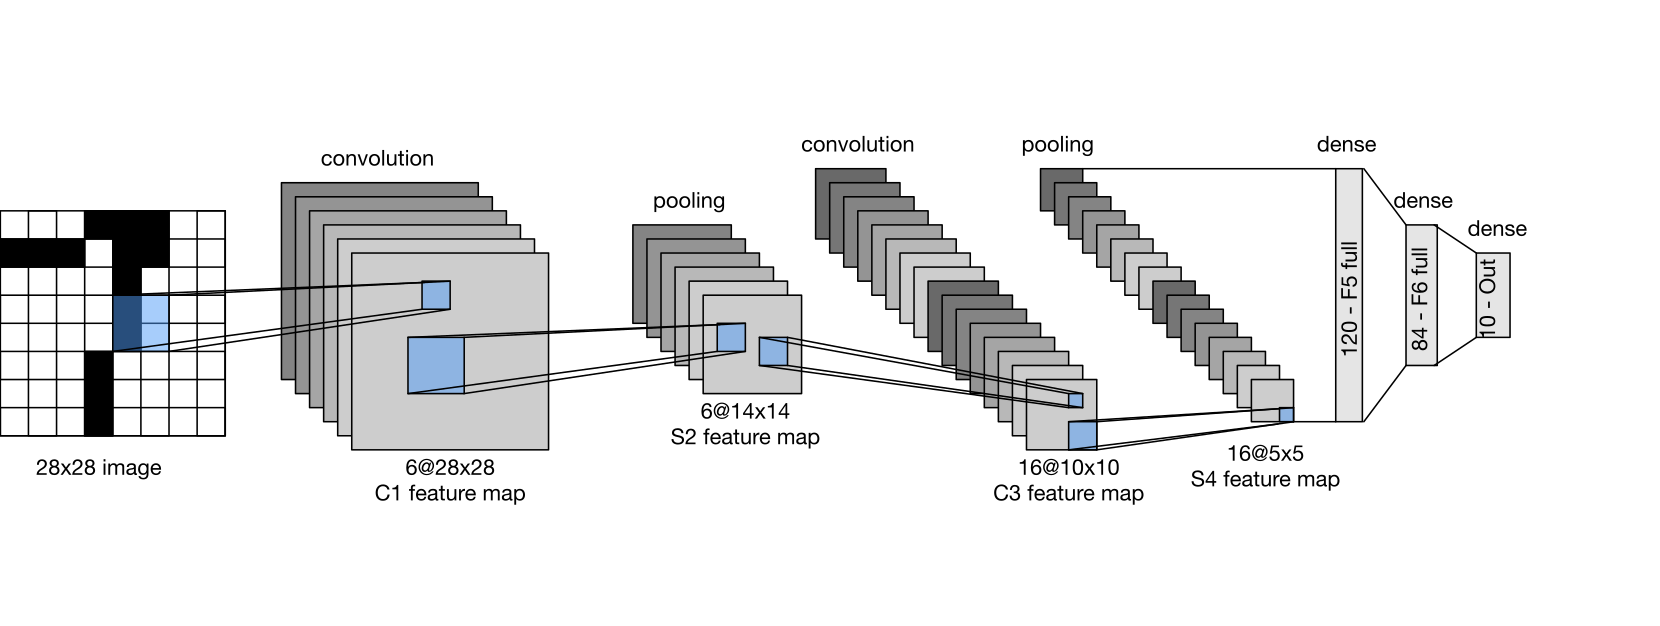

[Image Source](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html#img-lenet)

In [88]:
lenet_5_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 1
lenet_5_model.add( layers.Conv2D(filters = 6, kernel_size = (5,5),strides=1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 1
lenet_5_model.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=1, activation = 'relu'))
#Pooling layer 2
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model.add(layers.Flatten())
lenet_5_model.add(layers.Dense(120, activation='relu'))
lenet_5_model.add(layers.Dense(84, activation='relu'))
lenet_5_model.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model.save('part2_model.h5')


lenet_5_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_33 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_21 (Flatten)        (None, 400)               0         
                                                                 
 dense_58 (Dense)            (None, 120)             

### Compile and train the model


In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 9s 4ms/step - loss: 0.1994 - accuracy: 0.9407 - val_loss: 0.0637 - val_accuracy: 0.9793
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0699 - accuracy: 0.9791 - val_loss: 0.0526 - val_accuracy: 0.9823
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0444 - val_accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0454 - val_accuracy: 0.9854


### Plot accuracy and loss graphs

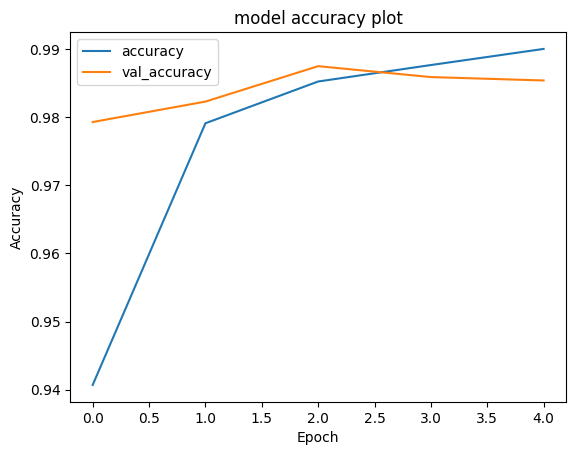

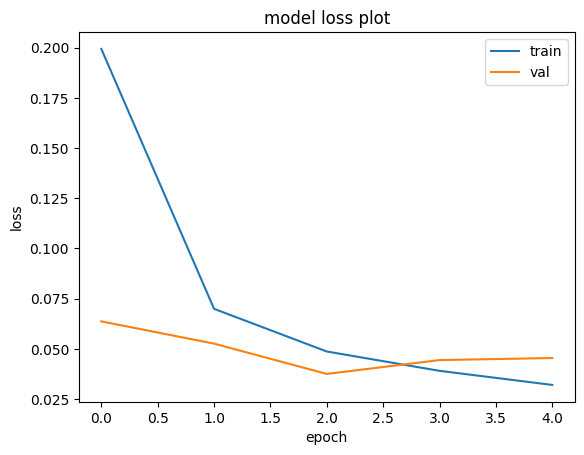

In [90]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
Applying the same evaluation metrics in part 1 to evaluate the trained CNN model:

1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [91]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0454 - accuracy: 0.9854 - 637ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 98.54000210762024 %
Model Size: 228395.00 bytes
Inference Time is 8.53295087814331e-05 s


## Excercises: (2.5 points)
Q1: Briefly compare the Fully connected (FC) model in part 1 and the CNN model in part 2 in terms of the model size, accuracy and inference time.**(0.5 point)**


---








Comparing the original FC Model and the CNN model we find the Size is alot larger in the FC Model by approximately 100,000 bytes. The accuracy is higher in the CNN model by about 1.3% and lastly the inference time is almost the same but the FC model is slightly faster by milliseceonds.

Q2: Modify the two convolutional layers of the LeNet-5 stride value into 2 and discuss the effect on the model size and accuracy. If the perfromance is affected, explain the reason? **(0.5 point)**

In [52]:
lenet_5_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 1
lenet_5_model.add( layers.Conv2D(filters = 6, kernel_size = (5,5),strides=2, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model.add(layers.MaxPooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 1
lenet_5_model.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=2, activation = 'relu'))
#Pooling layer 2
lenet_5_model.add(layers.MaxPooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model.add(layers.Flatten())
lenet_5_model.add(layers.Dense(120, activation='relu'))
lenet_5_model.add(layers.Dense(84, activation='relu'))
lenet_5_model.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model.save('part2_model.h5')


lenet_5_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 14, 14, 6)         156       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 7, 7, 6)           0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 2, 2, 16)          2416      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 1, 1, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 120)             

In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3458 - accuracy: 0.8891 - val_loss: 0.1383 - val_accuracy: 0.9559
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1373 - accuracy: 0.9578 - val_loss: 0.1236 - val_accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1080 - accuracy: 0.9657 - val_loss: 0.0961 - val_accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0933 - accuracy: 0.9712 - val_loss: 0.0802 - val_accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9740 - val_loss: 0.0800 - val_accuracy: 0.9735


In [55]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0800 - accuracy: 0.9735 - 615ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 97.35000133514404 %
Model Size: 59939.00 bytes
Inference Time is 0.00010577208995819092 s


When we increase the sstride size to 2 we find the accuracy and size is now decreased.We find the size is smaller as there is a smaller output from the convolutional layers which is used as the input for the(FC) layer.The decrease in accuracy is due to less features being learned in the convolutional layers because they are not being considered during the filtering.


Q3: Replace the average-pooling layer with a max-pooling layer for the LeNet-5 CNN model and discuss the effect on the trained model size and accuracy.**(0.5 point)**


In [85]:
e23_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 1
e23_model.add( layers.Conv2D(filters = 6, kernel_size = (5,5),strides=1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
e23_model.add(layers.MaxPooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 1
e23_model.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=1, activation = 'relu'))
#Pooling layer 2
e23_model.add(layers.MaxPooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
e23_model.add(layers.Flatten())
e23_model.add(layers.Dense(120, activation='relu'))
e23_model.add(layers.Dense(84, activation='relu'))
e23_model.add(layers.Dense(10, activation='softmax'))

# Save your model
e23_model.save('exercise_2_3_model.h5')


e23_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_20 (Flatten)        (None, 400)               0         
                                                                 
 dense_55 (Dense)            (None, 120)             

In [86]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0332 - val_accuracy: 0.9890
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0265 - val_accuracy: 0.9912
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0342 - val_accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0326 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0451 - val_accuracy: 0.9880


In [87]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0451 - accuracy: 0.9880 - 629ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 98.7999975681305 %
Model Size: 228312.00 bytes
Inference Time is 8.470425605773926e-05 s


The model's accuracy and size has remained almost the same it is lsightly more accurate is all, likely because max pooling would feed the most essential bit to the next layer so we should see higher accuracy. since its so highly accurate already and things are so close this accounts for why this wasnt a very significant change.

Q4: IoT devices are limited in storage and computation resources. Therefore lightweight machine-learning or compressed models are ideal for IoT edge devices.

In this exercise, you will modify the LeNet-5 CNN model on the MNIST dataset to reduce its size as much as possible (expecting less than 13k parameters) while maintaining inference accuracy equal to or above 95%. There is no limitation to the applied modifications. You may modify the number of filters, filter size, stride value, fully connected layers etc.**(1 point)**


In [59]:
lenet_5_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 1
lenet_5_model.add( layers.Conv2D(filters = 7, kernel_size = (5,5),strides=2, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model.add(layers.MaxPooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 1
lenet_5_model.add(layers.Conv2D(filters = 13, kernel_size = 5,strides=2, activation = 'relu'))
#Pooling layer 2
lenet_5_model.add(layers.MaxPooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model.add(layers.Flatten())
lenet_5_model.add(layers.Dense(95, activation='relu'))
lenet_5_model.add(layers.Dense(75, activation='relu'))
lenet_5_model.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model.save('part2_model.h5')


lenet_5_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 14, 14, 7)         182       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 7, 7, 7)           0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2, 13)          2288      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 1, 1, 13)          0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 13)                0         
                                                                 
 dense_44 (Dense)            (None, 95)              

In [61]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3437 - accuracy: 0.8929 - val_loss: 0.1510 - val_accuracy: 0.9517
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1397 - accuracy: 0.9572 - val_loss: 0.1264 - val_accuracy: 0.9603
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1129 - accuracy: 0.9650 - val_loss: 0.1217 - val_accuracy: 0.9615
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0975 - accuracy: 0.9694 - val_loss: 0.0997 - val_accuracy: 0.9677
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0861 - accuracy: 0.9724 - val_loss: 0.0953 - val_accuracy: 0.9684


In [62]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0953 - accuracy: 0.9684 - 607ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 96.84000015258789 %
Model Size: 45450.00 bytes
Inference Time is 8.12070369720459e-05 s


By adjusting the first two layers we can cut the amount of parameters significantly esspecially when targeting lower filters so we can decrease the parameters. as well increasing the stride helped to further lower the numbe rof parameters. all in all we got 11760 parameters and an accuracy if 96.84%